##### $Nota:$ el siguiente documento desciende de *jupyter*, popular editor que permite codificaciòn, ecuaciones LaTex y escritura de texto. <br>Fines didacticos se implementò Python para la comprobaciòn de algunos resultados aunque la tarea principal es _Act2JValencia R.
<br> Se puede usar [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) para correr el notebook Jupyter de Python.

##### El fichero zip  contienen 4 aportes: _Act2JValencia R (Tarea en R), Jupyter 2R (Còdigo con librerias R), Jupyter 2Python (Còdigo con librerias Python) y Act2Valencia Python (Tarea en Python).

In [ ]:
## Librerias a descargar
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install mlxtend==0.17.2 # Libreria de ML para PCA
!pip install factor_analyzer # Libreria para Factor analysis
!pip install seaborn==0.11.1 # Libreria para la graficaciòn estadistica

In [1]:
## Librerias que se usaràn para la tarea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from mlxtend.feature_extraction import PrincipalComponentAnalysis
from factor_analyzer.factor_analyzer import FactorAnalyzer as FA
import pandas_datareader.data as web
import seaborn as sns

# $2°$ $Actividad$ - $Econometria$ $Financiera$ 

##### Objetivos de la tarea
El principal objetivo de la segunda actividad consiste, a partir de una base de datos expresada en rentabilidades, en:
* obtener los **factores de riesgo latentes** mediante las dos técnicas estadísticas clásicas explicadas: **PCA** y **FA.**
* realizar un *breve comentario* entre las diferencias “básicas” entre las cuatro técnicas *PCA, FA, ICA y NLPCA.*

##### Presentacion del dataset
Para ésta tarea, se utilizaràn 20 empresas que cotizan en la bolsa de Nueva York.<br>
Tales empresas se escogieron segùn un criterio, o màs bien segùn algunos **sectores especificos**, en particular:
1. **'TXN', 'AMD', 'ADI', 'AMT', 'NVDA'** son 5 empresas productoras de dispositivos de **semiconductores** para computadoras.
2. **'MCD', 'ADS', 'HLF', 'LULU', 'NK', 'PLNT'** son 5 empresas, màs **McDonald's**, que se dedican principalmente a la ropa **deportiva** y **gymnasios.**
3. **'PFE', 'AZN', 'JNJ', 'ENDP', 'SAN'** son 5 empresas que se encuentran en la **industria farmaceutica**.
4. **'NTAP', 'PSTG', 'NTNX', 'DELL'** son 4 empresas del **Information Technology** que prestan servicios de analitica y otros.

Y en concreto distinguiremos segùn:
* **FARMA** seràn las empresas farmacéuticas
* **Other** empresas que se dedican al ropa deportiva, consultoria IT y McDonald's (Sectores Varios). 
* **SC** las empresas fabricante de semiconductores.
##### Longitud del dataset

Para el analisis utilizaremos datos del trienio pre-post pandemia que van desde el *01-Marzo-2018* hasta el *01-Marzo-2021* y las rentabilidades seràn diarias.

# Principal Components Analysis (PCA)

#### Premisas del PCA.  
El PCA, o anàlisis de componentes principales, es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») ortogonales, o sea no correlacionadas. <br> Las nuevas componentes se ordenan por la cantidad de varianza original que describen y son en numero menor a la cantidad de variables originales. <br>
Esto es, el principal objetivo: **<font color='navy'>reducción dimensión</font>**  **<font color='navy'>dataset original</font>** $\rightarrow$ **<font color='red'>reducciòn</font>**  **<font color='red'>datos analizados.</font>** <br> En finanzas de mercado la utilizamos para extraer factores de riesgo LATENTES es decir, no observables, que pueden explicar las
rentabilidades de carteras. Es decir se construyen en un espacio más pequeño de dimensiones (que el original) unos factores sintéticos o artificiales mediante proyecciones.

# Factorial Analisis (FA)

Por otro lado, el análisis factorial es una técnica estadística de reducción de datos usada para explicar las **correlaciones** entre las variables observadas en términos de un número menor de variables **no observadas llamadas factores**. <br>Las variables observadas se modelan como combinaciones lineales de factores más expresiones de error.

##### Procedimiento (PCA & FA)

Describimos el procedimiento como sigue:
> 1. **Data Cleaning & Data Collection**<br>
El primer paso consistirà en preparar el dataset, descargando la serie de precios de las empresas.<br>
Sucesivamente se calcularan las rentabilidades mensuales para las 20 firmas.
> 2. **Estandarizaciòn**<br>
Desde el momento que queremos resultados consistentes, necesitamos estandarizar nuestros datos para que el centroide esté en el origen y todas las variables tengan la misma varianza, en otras palabras, hacer que todas las variables tengan una media de cero y una desviación estándar (varianza unitaria) de 1.
> 3. **funciòn *reduccion_dimensionalidad***<br>
Pasaremos nuestra data a reduccion_dimensionalida(), ésta funciòn nos arrojara ya sea los resultados del PCA que FA simultàneamente.<br>
Las principales librerias en Python que permiten realizar PCA y FA son [scikit-learn](https://scikit-learn.org/stable/).<br>
Sin embargo usaremos dos **potentes** librerias como [mlxtend](http://rasbt.github.io/mlxtend/) dispuesta por [Sebastian Raschka](https://sebastianraschka.com/) que es Assistant Professor of Statistics at the University of Wisconsin-Madison y author del Best Seller Python Machine Learning [(Spanish Edition)](https://www.amazon.com/-/es/Vahid-Mirjalili/dp/8426727204).<br>
Mientras que para el analisis factorial usaremos la libreria [factor_analyzer](https://pypi.org/project/factor-analyzer/) por Jeremy Biggs.<br>
Por la características de la matriz que factorizamos(simétricas) aplicamos
la descomposición espectral (o eigenvalue decomposition).
<br>Pero en el caso que la matriz no lo sea podemos factorizarla mediante SVD.<br> Puesto que el primero un caso particular del segundo. Usaremos **descomposiciòn expectral**.<br>
En esta misma fase harémos los oportunos test como **BARTLETT** y **KMO**.
> 4. **Conclusiones**
<br> Después de haber llevado a cabo los calculos y graficado los resultados, comentaremos sobre los *factores sinteticos* o sea las componentes para analizar como las *nuevas variables/componentes* se relacionan con las rentabilidades de las empresas.<br> Importante aquì serà analizar que, habiendo escogido empresas en los mismos sectores, una vez observada la correlaciòn con la **primera componente** (**riesgo de mercado**), notar si empresas del mismo sector se mueven similarmente con la **segunda componente** (**riesgo sectorial)** formando **<font color='navy'> CLUSTERES</font>**.
<br>
##### Nos preguntaremos dado que buscamos correlaciones subyancentes, reduciendo la dimensionalidad de la data, deberìan empresas del mismo sector moverse similarmente , tal vez formando clusterés?

In [2]:
stocks = ['TXN', 'AMD', 'ADI', 'AMT', 'NVDA', # SEMICONDUCTIORES
          'MCD', 'ADS', 'HLF', 'LULU', 'NKE',# DEPORTES GYM
          'PFE', 'AZN', 'JNJ', 'ENDP', 'SAN', # FARMACEUTICAS
          'PLNT', 'NTAP', 'PSTG', 'NTNX', 'DELL'] 
portfolio = pd.DataFrame()
for firm in stocks:
    portfolio[firm] = web.DataReader(firm, 'yahoo', '2018-03-01', '2021-03-01')['Close']

In [3]:
returns = np.log(portfolio).diff().dropna() # Rentabilidades dìarias
returns_std = (returns - returns.mean())/(returns.std()) # Estandarizacòn/escaldamiento

In [4]:
returns_std.head()

TXN       AMD       ADI       AMT      NVDA       MCD  \
Date                                                                     
2018-03-02  0.701176 -0.277023  0.551065 -0.572291  0.546262 -2.852720   
2018-03-05  0.307034  0.157273  0.725726  1.069796 -0.155215  1.045294   
2018-03-06  0.257925 -0.414784  0.334377  0.765218  0.823005  0.042793   
2018-03-07 -0.513672  1.013039  0.340413  0.394320 -0.078040  0.427679   
2018-03-08  0.365543 -0.675829 -0.042238  0.997004 -0.122519  0.754981   

                 ADS       HLF      LULU       NKE       PFE       AZN  \
Date                                                                     
2018-03-02 -0.243811  1.278819  0.412649 -0.377146  0.553117  0.309211   
2018-03-05 -0.071232 -0.192508 -0.507518 -0.696373  0.291982  1.271486   
2018-03-06  0.370966  1.090969  1.115158  0.098309 -0.411938 -0.238546   
2018-03-07  0.057306  0.537023 -1.163187 -0.883427  0.086385 -0.151788   
2018-03-08  0.108443  0.423860 -0.336598  0.685019  0.973485  0.092767   

                 JNJ      ENDP       SAN      PLNT      NTAP      PSTG  \
Date                                                                     
2018-03-02  0.798035  0.941515  0.142208  0.239807  0.093636 -0.550675   
2018-03-05  0.490143  0.921664 -0.077050  0.318570  0.854252 -0.631281   
2018-03-06 -0.848313  0.099408  0.142208  0.611752  0.938938 -0.558718   
2018-03-07  0.413480 -0.080544 -0.022194  0.091825 -0.264627 -0.292851   
2018-03-08  1.553764 -0.393770 -0.242504  0.048338  0.303638  0.426768   

                NTNX      DELL  
Date                            
2018-03-02  1.684316 -0.918607  
2018-03-05  1.849425  0.142122  
2018-03-06  1.155595  0.788306  
2018-03-07  0.804194  0.820891  
2018-03-08  0.348944  0.024555

In [ ]:
returns_std.std() # Varianza unitaria después de estandarizaciòn

#### Analisis de componentes principales (PCA) y Analisis Factorial (FA)
A través de la siguiente funciòn calculamos para la **PCA**:
* **SCREE PLOT & Varianza Total Explicada**.
* **Loadings** como heatmap para visualizar como se correlacionan *items* con *componentes*
* **Scatter plot de componentes**
<br>Mientras que para la **FA**:
* **Test de Bartlett y KMO**
* Los primeros **8 factores** como heatmap para visualizar como se correlacionan *items* con *componentes*
* Varianza comun y varianza unica
* Heatmap de factores
* **Scatter plot de factores**

### Ahora graficamos las componentes y factores

Observaremos algunos evidentes clusteres como la alta correlaciòn de las **farmacéuticas** con la **2° componente**.

<br> Asimismo los **semiconductores** con el **1°factor** notamos una ligera **correlaciòn inversa entre FA1 y FA2.**

##### SC = semiconductores   
##### Other = otro tipo de sector   
##### Farma = Farmacéuticas

In [7]:
def reduccion_dimensionalidades(matriz, pca_componentes, num_factores): #### Còdigo de la funciòn para evaluar PCA y FA
    sector = pd.Series(['SC', 'SC', 'SC', 'Other', 'SC', 
          'Other', 'Other', 'Other', 'Other', 'Other',
         'Farma', 'Farma', 'Farma', 'Other', 'Farma',
         'Other', 'Other', 'Other', 'Other', 'Other'])
    plt.style.use('seaborn-darkgrid')
    print('Analisis de componente principal')
    pca2 = PrincipalComponentAnalysis(pca_componentes, solver='eigen')
    pca2.fit(returns_std)
    resumen2 = round(pd.DataFrame(pca2.e_vecs_, 
                       columns=['PC1', 'PC2', 'PC3', 'PC4', '5', '6', '7', '8','9', '10', '11', 
                               '12', '13', '14', '15', '16', '17', '18', '19', '20'],
                       index=returns.columns), 3)
    sector.index = resumen2.index
    resumen2['Sector'] = sector
    plt.title('scree plot', fontweight='bold')
    plt.ylabel('eigenvalue')
    plt.xlabel('Componente principal')
    plt.plot(pca2.e_vals_normalized_,'-ro')
    plt.show()
    print('Varianza Total Explicada')
    eigen = round(pd.DataFrame({'Componente':np.arange(1,21), 'Total':pca2.e_vals_,'% Varianza':pca2.e_vals_normalized_,
                      '% Acumulado':pca2.e_vals_normalized_.cumsum()}).set_index('Componente'), 3)
    print(eigen)
    #print(resumen2.iloc[:,:4]) # LIBRERIA MLXTEND Y DESCOMPOSICION ESPECTRAL
    
    print('='*60)
    print('Analisis Factorial con rotation varimax/orthogonal')
    print('='*60)
    print('Test De Bartlett')
    print('Chi-square',calculate_bartlett_sphericity(returns_std)[0])
    print('P-value' , calculate_bartlett_sphericity(returns_std)[1])
    print('='*30)
    print('Test KMO y MSA para cada item')
    kmo = pd.DataFrame(calculate_kmo(returns_std)[0], index=returns_std.columns).T
    print(kmo)
    print('='*30)
    print('Overall MSA', calculate_kmo(returns_std)[1] )
    
    print('='*30)
    print('Factores')
    f1 = FA(rotation='varimax', n_factors=num_factores)
    f1.fit(returns_std)
    resumen = round(pd.DataFrame(f1.loadings_, columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8'], 
                                index=returns.columns), 3)
    sector.index = resumen.index
    resumen['Sector'] = sector
    fac = pd.DataFrame({'Comunalidad': f1.get_communalities(), 'Uniqueness':f1.get_uniquenesses()}, index=returns.columns)
    print(fac)
    
    plt.rcParams['figure.figsize'] = [15,5]
    p0 = plt.subplot(1, 2, 1)
    sns.heatmap(resumen2.iloc[:,:4], annot=True)
    plt.title('Matriz - PC', fontweight='bold')
    p1 = plt.subplot(1, 2, 2)
    sns.heatmap(resumen.iloc[:,:-1], annot=True)
    plt.title('Matriz - FA', fontweight='bold')
    
    plt.suptitle('Factores y Componentes')
    
    plt.title('Factores', fontweight='bold')
    sns.relplot(data = resumen2, x = 'PC1', y = 'PC2', hue='Sector')
    plt.ylabel('2° Componente')
    plt.xlabel('1° Componente')
    
    plt.title('Factores', fontweight='bold')
    sns.relplot(data=resumen, x = 'F1', y = 'F2', hue = 'Sector')
    plt.ylabel('2° Factor')
    plt.xlabel('1° Factor')
    plt.show()

##### Le pasamos 4 Componentes y 8 Factores

Analisis de componente principal


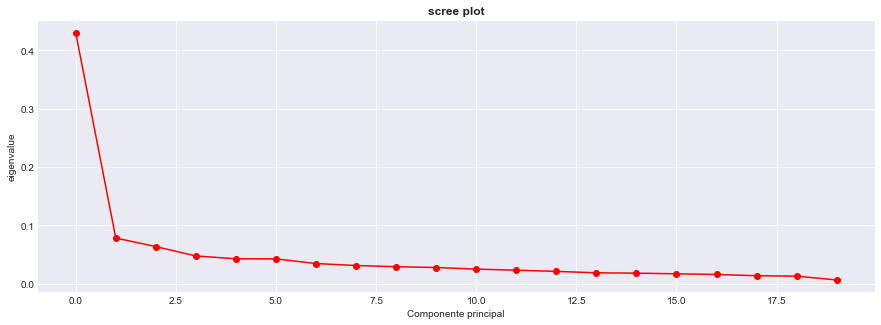

Varianza Total Explicada
            Total  % Varianza  % Acumulado
Componente                                
1           8.596       0.430        0.430
2           1.566       0.078        0.508
3           1.273       0.064        0.572
4           0.951       0.048        0.619
5           0.856       0.043        0.662
6           0.852       0.043        0.705
7           0.692       0.035        0.739
8           0.624       0.031        0.770
9           0.584       0.029        0.800
10          0.556       0.028        0.827
11          0.502       0.025        0.853
12          0.464       0.023        0.876
13          0.424       0.021        0.897
14          0.375       0.019        0.916
15          0.363       0.018        0.934
16          0.341       0.017        0.951
17          0.318       0.016        0.967
18          0.275       0.014        0.980
19          0.260       0.013        0.993
20          0.130       0.007        1.000
Analisis Factorial con rotati

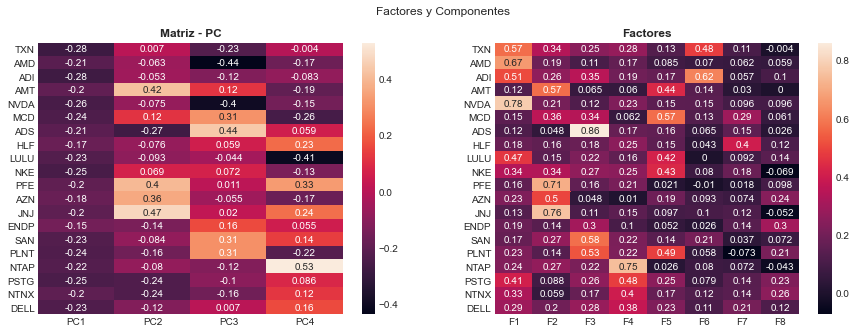

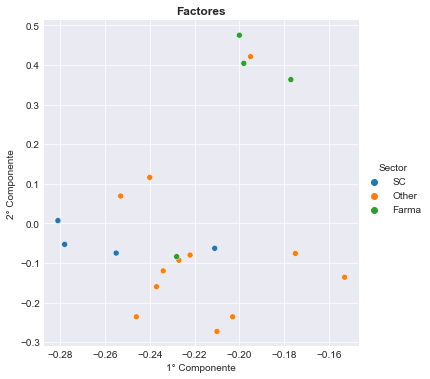

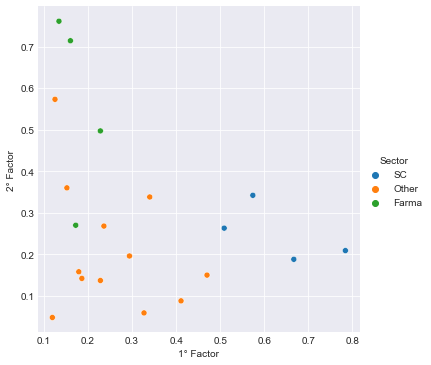

In [8]:
reduccion_dimensionalidades(returns_std, 4, 8)

##### PCA
* Los puntos **<font color='green'>verde</font>** tiene una alta correlaciòn con la segunda componente, o sea las farmaceuticas màs una de color naranja, o sea el fideicomiso de inversiòn inmobiliaria(AMT).
* Los puntos **<font color='blue'> azules </font>** presentan una correlaciòn negativa mayor con la primera componente mas no tanto con la segunda componente.

##### FA
* FACTOR 1: El primer factor explica principalmente los fabricantes de **semiconductores**
* FACTOR 2: El segundo factor explica principalmente las empresas **Farmacéuticas**
* FACTOR 3: El tercer factor explica principalmente a la empresas de servicios de marketing ADS

## Bibliografia


* Welcome to STAT 505: Applied Multivariate Statistical Analysis. [Curso online](https://online.stat.psu.edu/stat505/)
* A PRACTICAL INTRODUCTION TO FACTOR ANALYSIS: EXPLORATORY FACTOR ANALYSIS [UCLA University SPSS](https://stats.idre.ucla.edu/spss/seminars/introduction-to-factor-analysis/a-practical-introduction-to-factor-analysis/)
* Apuntes del Prof. Storra
* [NLPCA.ORG](nlpca.org)
* Towards Data Science Independent Component Analysis (ICA) | by Shawhin Talebi. [articulo](https://towardsdatascience.com/independent-component-analysis-ica-a3eba0ccec35)
* Fundamentos básicos del Análisis de Componentes Independientes.  [bibing.us.es](http://bibing.us.es/proyectos/abreproy/11088/fichero/Proyecto+Fin+de+Carrera%252F5.pdf)